# HOS04 - Section 5: Data Transformation

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
# Transformation
trans = pd.DataFrame({
    "A": [12, 4, 5, None, 1],
    "B": [7, 2, 54, 3, None],
    "C": [20, 16, 11, 3, 8],
    "D": [14, 3, None, 2, 6]
}, index=['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'])

trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [3]:
# Results
result = trans.transform(lambda x: x + 10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


# HOS04 - Section 6: Data Discretization

In [4]:
# 10 random numbers from 10–200
x = np.random.randint(10, 200, size=10)
x

array([ 95,  14,  71, 139,  94,  15, 174, 106, 194,  68])

In [5]:
# 50 threshold
np.digitize(x, bins=[50])

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [6]:
# 3 Categories
np.digitize(x, bins=[50,100])

array([1, 0, 1, 2, 1, 0, 2, 2, 2, 1], dtype=int64)

In [7]:
# Dataframe for cut
df = pd.DataFrame({"height": x})
df

,height
0,95
1,14
2,71
3,139
4,94
5,15
6,174
7,106
8,194
9,68


In [8]:
# create new column 'binned' with interval
df['binned'] = pd.cut(x=df['height'], bins=[0, 25, 50, 100, 200])
df

,height,binned
0,95,"(50, 100]"
1,14,"(0, 25]"
2,71,"(50, 100]"
3,139,"(100, 200]"
4,94,"(50, 100]"
5,15,"(0, 25]"
6,174,"(100, 200]"
7,106,"(100, 200]"
8,194,"(100, 200]"
9,68,"(50, 100]"


In [9]:
df['bin_label'] = pd.cut(
    x=df['height'],
    bins=[0, 25, 50, 100, 200],
    labels=[1, 2, 3, 4]
)
df

,height,binned,bin_label
0,95,"(50, 100]",3
1,14,"(0, 25]",1
2,71,"(50, 100]",3
3,139,"(100, 200]",4
4,94,"(50, 100]",3
5,15,"(0, 25]",1
6,174,"(100, 200]",4
7,106,"(100, 200]",4
8,194,"(100, 200]",4
9,68,"(50, 100]",3


In [10]:
pd.qcut(df['height'], q=5)

0      (84.8, 99.4]
1    (13.999, 57.4]
2      (57.4, 84.8]
3     (99.4, 146.0]
4      (84.8, 99.4]
5    (13.999, 57.4]
6    (146.0, 194.0]
7     (99.4, 146.0]
8    (146.0, 194.0]
9      (57.4, 84.8]
Name: height, dtype: category
Categories (5, interval[float64, right]): [(13.999, 57.4] < (57.4, 84.8] < (84.8, 99.4] < (99.4, 146.0] < (146.0, 194.0]]

In [11]:
degrees = ["none", "cum laude", "magna cum laude", "summa cum laude"]

student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)

student_results_degrees = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)

honor = pd.DataFrame({
    'grades': student_results,
    'honors': student_results_degrees
})

honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


<Axes: >

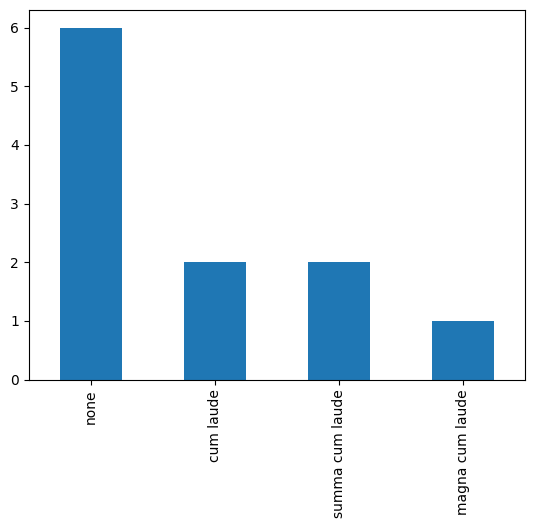

In [12]:
pd.Series(student_results_degrees).value_counts().plot.bar()